[*********************100%***********************]  10 of 10 completed


Daily Correlation Matrix (based on daily returns):
Ticker      AAPL      AMZN     BRK-B     GOOGL       JPM      META      MSFT      NVDA      TSLA         V
Ticker                                                                                                    
AAPL    1.000000  0.534427  0.729873  0.354290  0.502320 -0.011192  0.850360  0.499146  0.804848 -0.500789
AMZN    0.534427  1.000000  0.145650  0.827669  0.273010  0.570057  0.653153 -0.302854  0.695355 -0.505913
BRK-B   0.729873  0.145650  1.000000 -0.272032  0.752967 -0.097586  0.781533  0.861424  0.197709  0.056042
GOOGL   0.354290  0.827669 -0.272032  1.000000 -0.038963  0.565175  0.263471 -0.524635  0.744885 -0.739509
JPM     0.502320  0.273010  0.752967 -0.038963  1.000000  0.241783  0.714366  0.670065  0.111332 -0.261922
META   -0.011192  0.570057 -0.097586  0.565175  0.241783  1.000000  0.048981 -0.240664  0.027164 -0.133114
MSFT    0.850360  0.653153  0.781533  0.263471  0.714366  0.048981  1.000000  0.425328  0.620

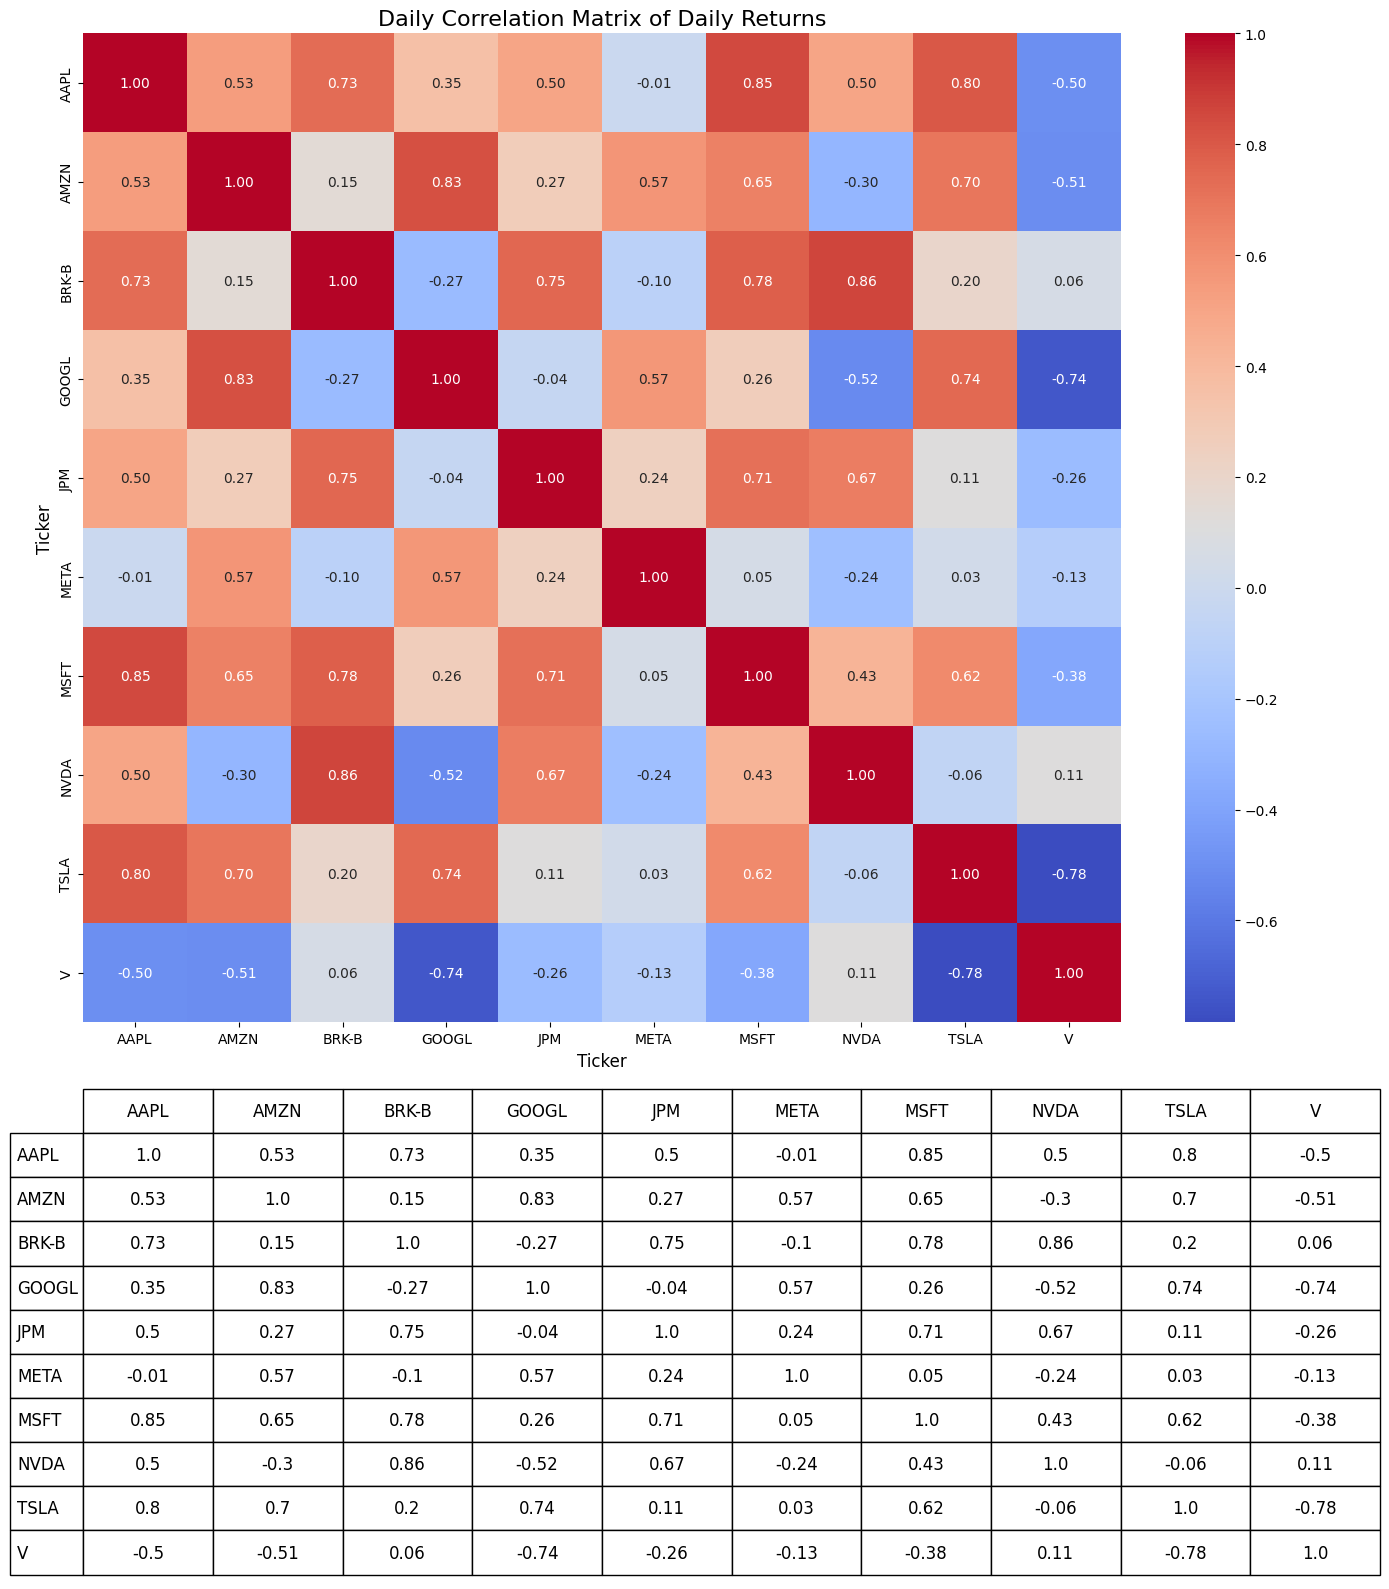

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Define tickers for the 10 biggest stocks (by market cap)
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'V']

# Get today's date
today = datetime.date.today()

# Download data for the past 10 days to capture the most recent trading days
end_date = today.strftime("%Y-%m-%d")
start_date = (today - datetime.timedelta(days=10)).strftime("%Y-%m-%d")

# Download daily OHLC data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")

# Compute daily returns using closing prices; this will yield NaN for the first row
returns = data['Close'].pct_change()

# Compute the correlation matrix of the daily returns (ignoring NaNs automatically)
corr_matrix = returns.corr()

# Print a nicely formatted correlation matrix to the console
print("Daily Correlation Matrix (based on daily returns):")
print(corr_matrix.to_string())

# Save the correlation matrix as a CSV file
corr_matrix.to_csv("DailyCorrelationReport.csv")

# Create a figure with two subplots: one for the heatmap and one for the table display
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16), gridspec_kw={'height_ratios': [4, 2]})

# --- Heatmap ---
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax1)
ax1.set_title("Daily Correlation Matrix of Daily Returns", fontsize=16)
ax1.set_xlabel("Ticker", fontsize=12)
ax1.set_ylabel("Ticker", fontsize=12)

# --- Table ---
ax2.axis('off')
# Prepare a rounded version of the correlation matrix for the table display
rounded_corr = corr_matrix.round(2)
table = ax2.table(cellText=rounded_corr.values,
                  rowLabels=rounded_corr.index,
                  colLabels=rounded_corr.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Adjust layout to avoid overlap and save the figure as a PDF file
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.savefig("DailyCorrelationReport.pdf", format="pdf")

# Optionally, display the plot (if running in an environment that supports GUI)
plt.show()
